# TSF - Graduate Rotational Internship Program (Oct '21)

## Data Science and Business Analytics Internship

### Name: Janhavi Pimplikar

### Task 2 - Prediction using Unsupervised ML

### Predicting the optimum number of clusters from the 'Iris' dataset

In this task, we will be accessing an open-access dataset titled 'Iris.csv' and will be performing cluster analysis (unsupervised learning) on the data so obtained. These clusters will then be represented visually using a scatter plot.

### Step 1: Importing the necessary libraries

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings 
warnings.filterwarnings("ignore")

### Step 2: Accessing the dataset

In [15]:
data = pd.read_csv("Iris.csv")

In [16]:
data.shape

(150, 6)

In [17]:
data.head(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


In [18]:
data.tail(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
140,141,6.7,3.1,5.6,2.4,Iris-virginica
141,142,6.9,3.1,5.1,2.3,Iris-virginica
142,143,5.8,2.7,5.1,1.9,Iris-virginica
143,144,6.8,3.2,5.9,2.3,Iris-virginica
144,145,6.7,3.3,5.7,2.5,Iris-virginica
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [20]:
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [21]:
data.isna().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

### Step 3: Exploratory Data Analysis

For measuring the dimensional parameters of each Iris specie, we will consider a 'box-plot' to visualize the data and analyze
results accordingly. A box plot is made up of 5 parts:
    
1. Minima value: The lowest value measured
2. Maxima value: The highest value measured
3. Median value / Second Quartile: The average value amongst all possible values measured
4. First Quartile: Median of the values left to the actual median 
5. Third Quartile: Median of the values right to the actual median 

#### 1. Sepal Length (in cm) for each Species 

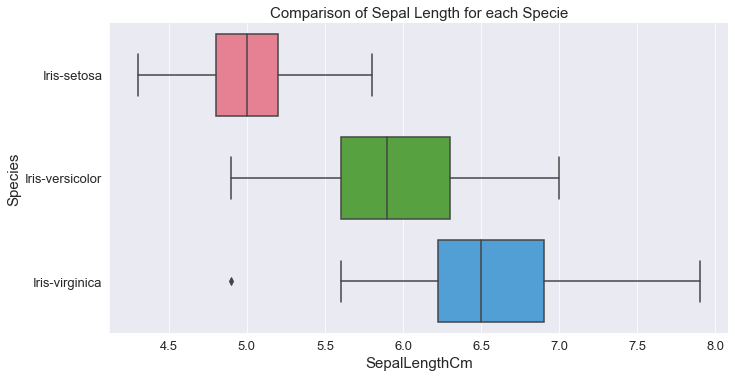

In [22]:
sns.catplot(x = "SepalLengthCm", y = "Species", data = data, kind = "box", height = 5, aspect = 2, palette = "husl")
plt.xlabel("SepalLengthCm", size = 15)
plt.ylabel("Species", size = 15)
plt.xticks(size = 13)
plt.yticks(size = 13)
plt.title("Comparison of Sepal Length for each Specie", size = 15)
sns.set_style("darkgrid")

**From the above graph we can conclude that the variety 'Iris-virginica' has the longest sepal length, followed by the 'Iris-versicolor' and the 'Iris-setosa' respectively.**

#### 2. Sepal Width (in cm) for each Species

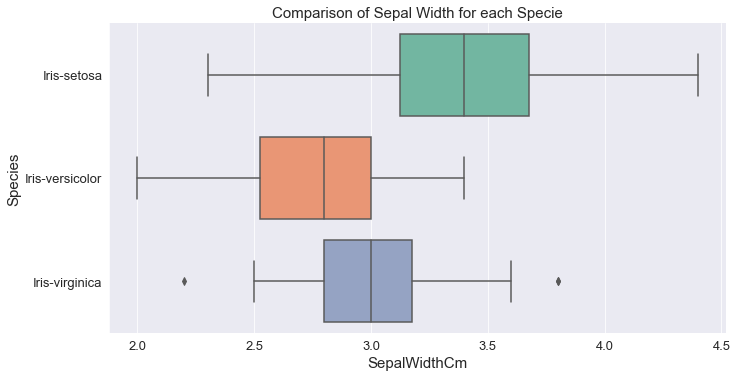

In [23]:
sns.catplot(x = "SepalWidthCm", y = "Species", data = data, kind = "box", height = 5, aspect = 2, palette = "Set2")
plt.xlabel("SepalWidthCm", size = 15)
plt.ylabel("Species", size = 15)
plt.xticks(size = 13)
plt.yticks(size = 13)
plt.title("Comparison of Sepal Width for each Specie", size = 15)
sns.set_style("darkgrid")

**From the graph we can conclude that 'Iris-setosa' has the widest sepal length, followed by 'Iris-virginica' and 'Iris-versicolor'.**

#### 3. Petal length (in cm) for each Species

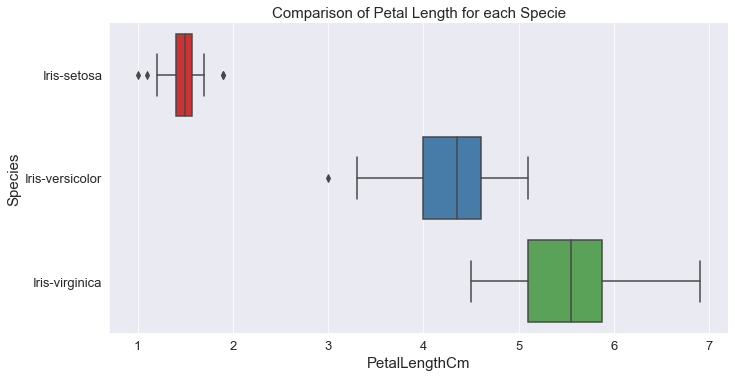

In [24]:
sns.catplot(x = "PetalLengthCm", y = "Species", data = data, kind = "box", height = 5, aspect = 2, palette = "Set1")
plt.xlabel("PetalLengthCm", size = 15)
plt.ylabel("Species", size = 15)
plt.xticks(size = 13)
plt.yticks(size = 13)
plt.title("Comparison of Petal Length for each Specie", size = 15)
sns.set_style("darkgrid")

**From the graph, we can conclude that 'Iris-virginica' has the longest petal length, followed by 'Iris-versicolor' and 'Iris-setosa'
respectively.**

#### 4. Petal width (in cm) for each Species

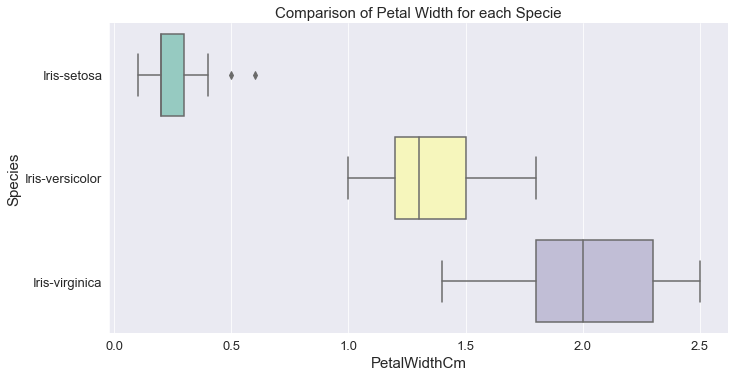

In [25]:
sns.catplot(x = "PetalWidthCm", y = "Species", data = data, kind = "box", height = 5, aspect = 2, palette = "Set3")
plt.xlabel("PetalWidthCm", size = 15)
plt.ylabel("Species", size = 15)
plt.xticks(size = 13)
plt.yticks(size = 13)
plt.title("Comparison of Petal Width for each Specie", size = 15)
sns.set_style("darkgrid")

**From the graph, we can conclude that 'Iris-virginica' has the largest petal width, followed by 'Iris-versicolor' and 'Iris-setosa' respectively.**

### Step 4: Finding the optimum number of clusters

Here, we will find the optimum number of clusters for k-means classification 

In [30]:
from sklearn.cluster import KMeans
cols = data.iloc[:,[0,1,2,3]].values
WCSS = []

for i in range(1,11):
    kmeans = KMeans(n_clusters = i, init = "k-means++", max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(cols)
    WCSS.append(kmeans.inertia_)

Plotting the above obtained cluster data onto a line plot

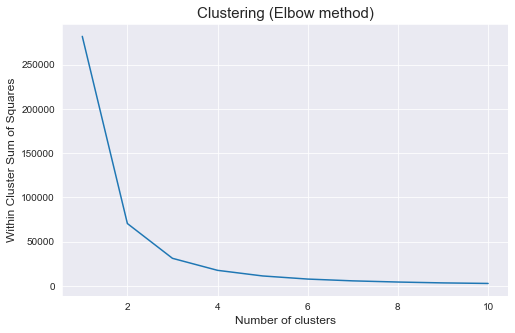

In [31]:
plt.figure(figsize = [8,5])
plt.plot(range(1,11), WCSS)
plt.xlabel('Number of clusters', size = 12)
plt.ylabel('Within Cluster Sum of Squares', size = 12)
plt.title('Clustering (Elbow method)', size = 15)
plt.show()

**From the above graph, we can observe that the graph takes a considerable turn at the point where 'Number of clusters' is 3. 
Hence, we can consider the number of clusters to be generated as 3. This is because the WCSS does not reduce considerably after this point.**

In [34]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(cols)

We can now visualize the clusters

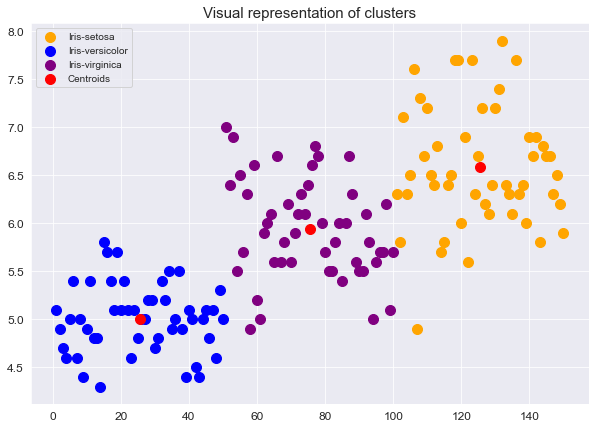

In [41]:
plt.figure(figsize = (10,7))
plt.scatter(cols[y_kmeans == 0, 0], cols[y_kmeans == 0,1], s = 100, c = 'orange', label = 'Iris-setosa')
plt.scatter(cols[y_kmeans == 1, 0], cols[y_kmeans == 1,1], s = 100, c = 'blue', label = 'Iris-versicolor')
plt.scatter(cols[y_kmeans == 2, 0], cols[y_kmeans == 2,1], s = 100, c = 'purple', label = 'Iris-virginica')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'red', label = 'Centroids')
plt.legend()
plt.xticks(size = 12)
plt.yticks(size = 12)
plt.title('Visual representation of clusters', size = 15)
plt.show()